<a href="https://colab.research.google.com/github/Amehlawal/AI_and_ML/blob/main/Stock_Prediction_Using_LSTM/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [4]:
now = datetime.now()
ticker = 'AAPL'
# start = dt.datetime(2010,1,1)
start = datetime(now.year - 10, now.month,now.day)
end = now
df = yf.download(ticker,start,end)
df

/tmp/ipython-input-266211724.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker,start,end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-10-26,25.906368,26.546836,25.825467,26.535601,265335200
2015-10-27,25.742315,26.189519,25.616468,25.933332,279537600
2015-10-28,26.803019,26.809762,26.081650,26.277162,342205600
2015-10-29,27.086172,27.122129,26.578292,26.674924,204909200
2015-10-30,26.854702,27.241230,26.843465,27.189543,197461200
...,...,...,...,...,...
2025-10-20,262.239990,264.380005,255.630005,255.889999,90483000
2025-10-21,262.769989,265.290009,261.829987,261.880005,46695900


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-10-26,25.906368,26.546836,25.825467,26.535601,265335200
2015-10-27,25.742315,26.189519,25.616468,25.933332,279537600
2015-10-28,26.803019,26.809762,26.081650,26.277162,342205600
2015-10-29,27.086172,27.122129,26.578292,26.674924,204909200
2015-10-30,26.854702,27.241230,26.843465,27.189543,197461200


In [7]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-10-20,262.239990,264.380005,255.630005,255.889999,90483000
2025-10-21,262.769989,265.290009,261.829987,261.880005,46695900
2025-10-22,258.450012,262.850006,255.429993,262.649994,45015300
2025-10-23,259.579987,260.619995,258.010010,259.940002,32754900
2025-10-24,262.820007,264.130005,259.179993,261.190002,38221700


In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.shape

(2515, 5)

In [10]:
df.isna().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [11]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,109.832500,110.926742,108.622031,109.727078,1.040757e+08
std,71.050181,71.733886,70.275360,70.972152,5.875457e+07
min,20.624050,20.927684,20.425436,20.546434,2.323470e+07
25%,40.795912,41.051533,40.520886,40.812555,6.403880e+07
50%,114.335640,116.356500,113.244299,115.101701,9.048110e+07
75%,169.530998,171.263929,168.273967,169.283856,1.277279e+08
max,262.820007,265.290009,261.829987,262.649994,5.334788e+08


In [12]:
df = df.reset_index()

In [13]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-10-26,25.906368,26.546836,25.825467,26.535601,265335200
1,2015-10-27,25.742315,26.189519,25.616468,25.933332,279537600
2,2015-10-28,26.803019,26.809762,26.081650,26.277162,342205600
3,2015-10-29,27.086172,27.122129,26.578292,26.674924,204909200
4,2015-10-30,26.854702,27.241230,26.843465,27.189543,197461200


## Data Exploration and Visualization

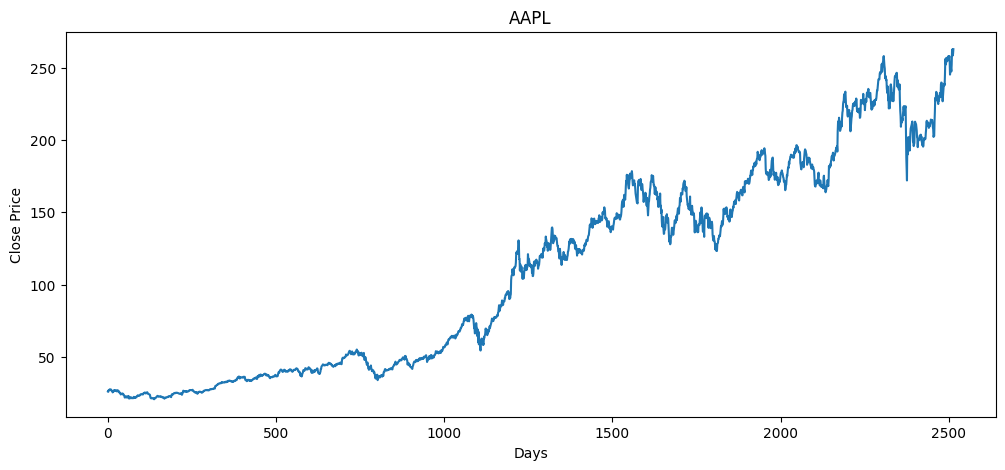

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.show()

# Feature Engineering

# Data Preprocessing

In [17]:
df.shape

(2515, 6)

In [19]:
# splitting dddata into training and testing
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[0:int(len(df)*0.3)])

data_testing

Ticker,AAPL
0,25.906368
1,25.742315
2,26.803019
3,27.086172
4,26.854702
...,...
1755,136.229553
1756,140.196930
1757,141.516083
1758,141.624405


Ticker,AAPL
0,25.906368
1,25.742315
2,26.803019
3,27.086172
4,26.854702
...,...
749,52.674191
750,52.446571
751,51.220707
752,52.000797


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03347072],
       [0.03243122],
       [0.03915223],
       ...,
       [0.76601658],
       [0.76670295],
       [0.76377097]])

# Model Building

In [21]:
import tensorflow as tf

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [27]:
model = Sequential()

model.add(Input(shape=(100, 1)))

model.add(LSTM(units=128, activation="tanh", return_sequences=True))
model.add(LSTM(units=64, activation="tanh", return_sequences=True))
# model.add(LSTM(units=16, activation="tanh", return_sequences=True))
model.add(Dense(25))
model.add(Dense(1))